# Learning Tensorflow

## Try to Training Tensorflow Model with MNIST Dataset

In [126]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


In [127]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [128]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

c:\Users\itzbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
predictions = model(X_train[:1]).numpy()
predictions

array([[ 0.24988362,  0.06411152, -0.22434506,  0.35321817, -0.10360006,
         0.53788704, -0.18776737, -0.41180307,  0.39038444,  0.1651928 ]],
      dtype=float32)

In [130]:
tf.nn.softmax(predictions).numpy()

array([[0.11326483, 0.09406222, 0.07049205, 0.12559508, 0.0795388 ,
        0.1510683 , 0.07311822, 0.05844242, 0.13035081, 0.1040673 ]],
      dtype=float32)

In [131]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [132]:
loss_fn(y_train[:1], predictions).numpy()

1.8900234

In [133]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [134]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8543 - loss: 0.4919
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9526 - loss: 0.1595
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1140
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9718 - loss: 0.0922
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0758


In [135]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 804us/step - accuracy: 0.9767 - loss: 0.0776


[0.07763747870922089, 0.9767000079154968]

In [136]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [137]:

probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.7742817e-09, 7.5011602e-10, 2.7760495e-06, 1.9782201e-05,
        2.3441070e-11, 1.7668940e-09, 4.4740351e-13, 9.9997568e-01,
        3.6572612e-09, 1.7879612e-06],
       [3.6799353e-08, 1.6232560e-04, 9.9957174e-01, 1.0183338e-05,
        3.6433635e-14, 2.5426073e-04, 2.5366842e-07, 4.3637400e-13,
        1.1330421e-06, 6.6562606e-12],
       [6.1507166e-08, 9.9803597e-01, 6.4814033e-04, 6.1841661e-06,
        4.9066632e-05, 1.8526289e-05, 3.9403334e-05, 7.3303515e-04,
        4.6545002e-04, 4.2015708e-06],
       [9.9978012e-01, 4.7631287e-12, 1.7746531e-04, 3.6656502e-06,
        1.4458064e-07, 1.8110177e-05, 1.7216369e-05, 2.8503609e-06,
        2.3765988e-08, 5.5127697e-07],
       [6.4729197e-06, 1.6221662e-09, 1.5660413e-05, 3.6488178e-08,
        9.9921489e-01, 1.1176750e-07, 1.8026280e-07, 3.2924028e-05,
        9.5150838e-08, 7.2962837e-04]], dtype=float32)>

## Try to Train Fashion MNIST Dataset 

In [138]:
fashion_mnist = tf.keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [139]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [140]:
print("Traini_image shape:", train_images.shape)
print("Traini_image len:", len(train_labels))
print("Train_labels:",train_labels)

Traini_image shape: (60000, 28, 28)
Traini_image len: 60000
Train_labels: [9 0 0 ... 3 0 5]


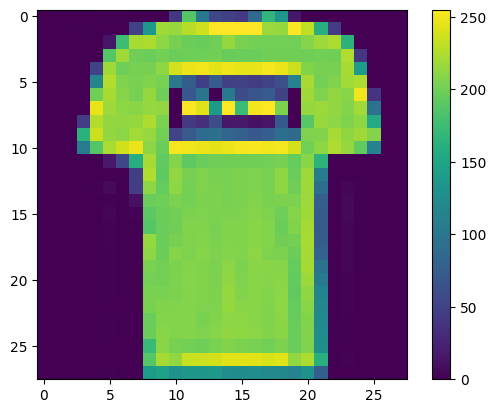

In [141]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [142]:
train_images = train_images / 255.0
test_imagaes = test_images / 255.0

### Display MNIST Fashion Images

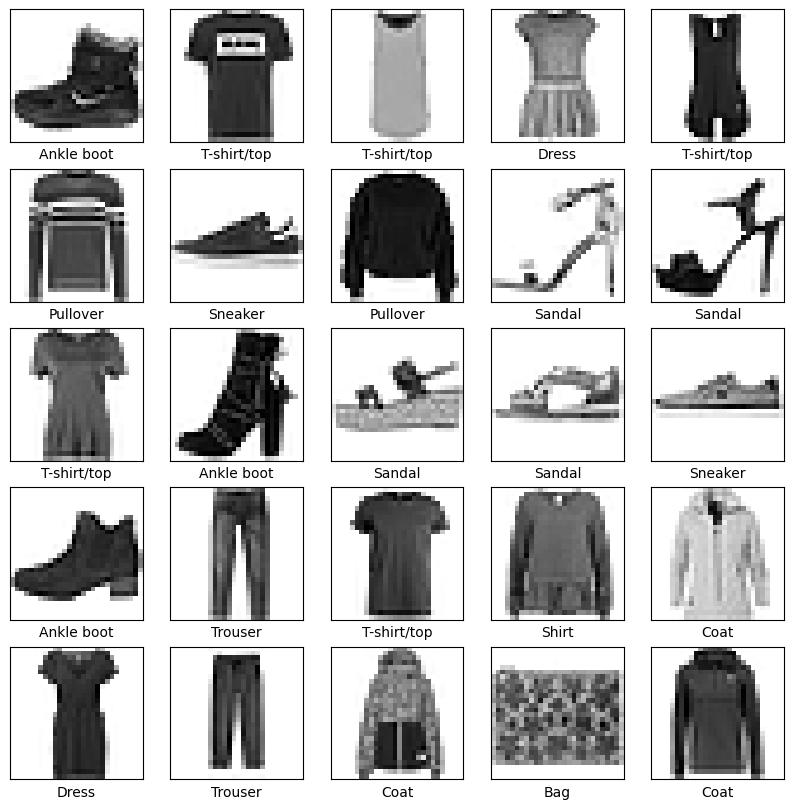

In [143]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1),
  plt.xticks(([]))
  plt.yticks(([]))
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

### Train the model

In [144]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [145]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [146]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7822 - loss: 0.6271
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.3850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3366
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3146
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8913 - loss: 0.2953
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.2759
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2700
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9058 - loss: 0.2556
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9087 - loss: 0.2446
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9114 - loss: 0.2375


In [147]:
test_loss, test_acc = model.evaluate(test_imagaes, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 901us/step - accuracy: 0.8837 - loss: 0.3347

Test accuracy: 0.8837000131607056


In [148]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [149]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


In [150]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [151]:
np.argmax(predictions[0])

9

In [160]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))

In [161]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

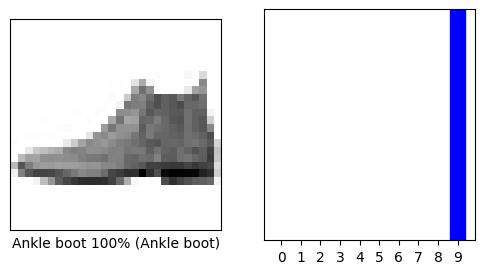

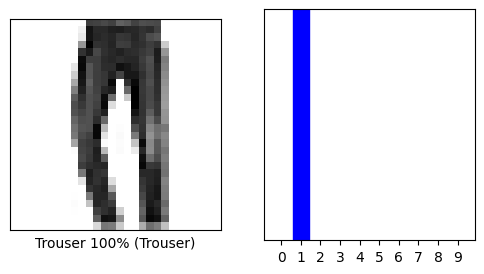

In [162]:
for i in [0, 5]:
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1, 2, 2)
  plot_value_array(i, predictions[i], test_labels)
plt.show() 


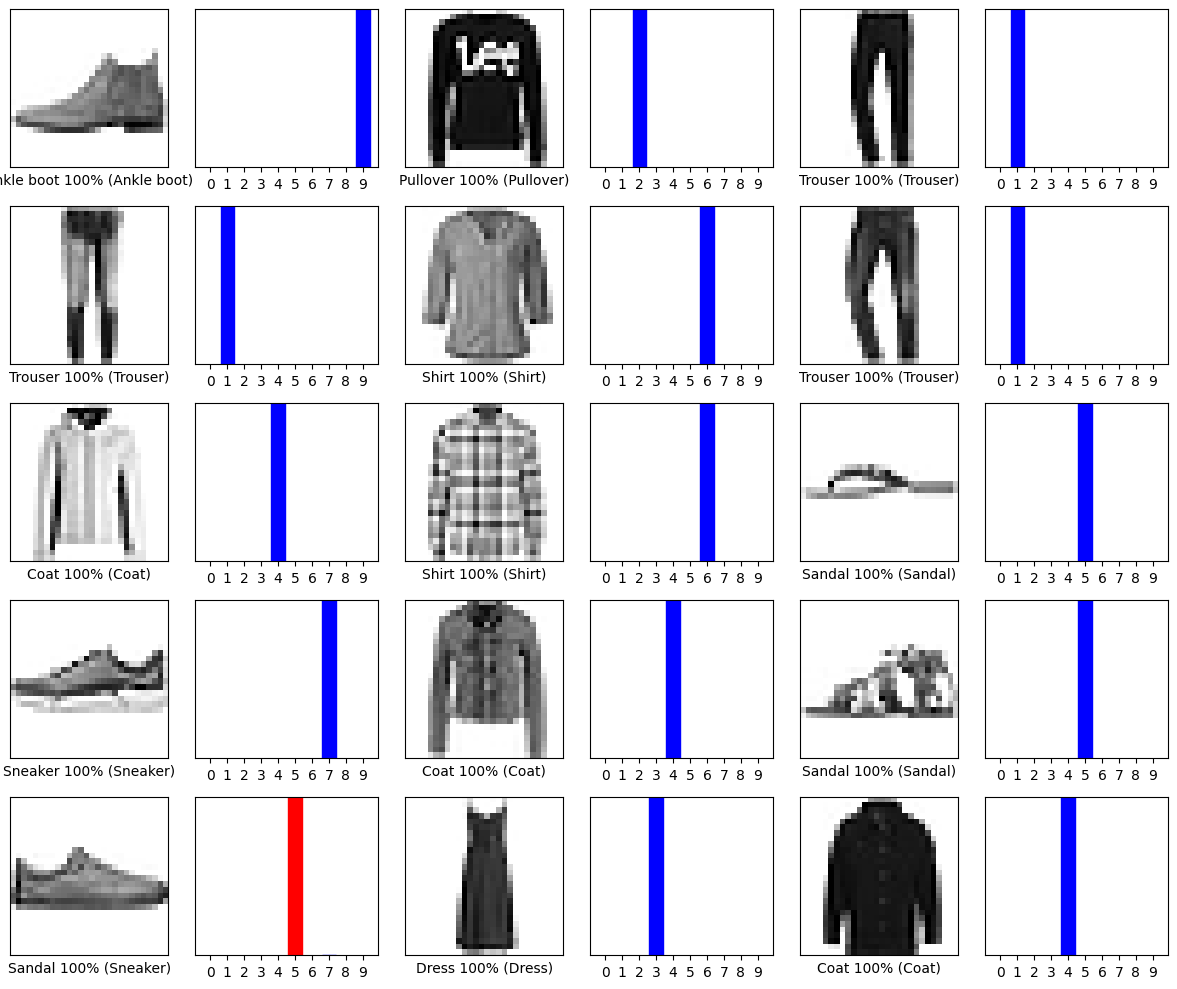

In [163]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [164]:
img = test_images[1]

print(img.shape)

(28, 28)


In [165]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [166]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


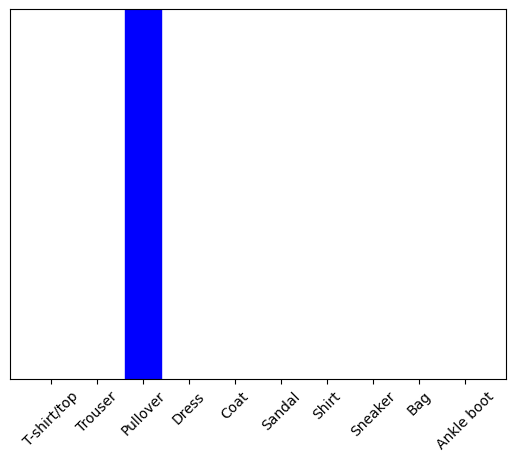

In [167]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [168]:
np.argmax(predictions_single[0])

2